In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [20]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cnnConvolve(filterDim, numFilters, images, W, b,hparameters={'stride':1,'pad':0}):
    numImages = images.shape[0]
    imageDim = images.shape[1]
    stride=hparameters['stride']#为图方便，默认为1
    pad=hparameters['pad']
    convDim = (imageDim - filterDim+2*pad)/stride + 1;
    convolvedFeatures = np.zeros([convDim, convDim, numFilters, numImages])
    for imageNum in range(numImages):
        for filterNum in range(numFilters):
            convolvedImage = np.zeros([convDim, convDim]);
            for i in range(convDim):
                for  j in range(convDim):
                    temp_image=images[imageNum,:,:]
                    temp_w=W[filterNum,:,:]
                    temp_b=b[filterNum]
                    v_start=i*stride
                    h_start=j*stride
                    temp_conved=sigmoid(np.sum(temp_image[v_start:v_start+filterDim,h_start:h_start+filterDim]*temp_w)+temp_b)
                    convolvedImage[i,j]=temp_conved
            convolvedFeatures[:,:,filterNum,imageNum]=convolvedImage
    return convolvedFeatures
                    

In [11]:
a=np.random.rand(7,7)
print(a)
a[2:5,2:5]

[[ 0.0250474   0.97005431  0.62342126  0.50241613  0.60429297  0.77847394
   0.26657881]
 [ 0.42159289  0.07168768  0.21582596  0.55523751  0.48502261  0.79102939
   0.86027143]
 [ 0.07710751  0.79405592  0.72392503  0.80571809  0.75404376  0.83943331
   0.06057553]
 [ 0.56217804  0.1586037   0.98625029  0.86830841  0.87228947  0.53453032
   0.36730653]
 [ 0.26779377  0.95338038  0.28504647  0.47707524  0.08122326  0.83673518
   0.24098224]
 [ 0.16235835  0.58776987  0.65749585  0.01402991  0.22285323  0.98945993
   0.36116441]
 [ 0.08521121  0.2395229   0.92958391  0.45926697  0.3788354   0.76737554
   0.34353656]]


array([[ 0.72392503,  0.80571809,  0.75404376],
       [ 0.98625029,  0.86830841,  0.87228947],
       [ 0.28504647,  0.47707524,  0.08122326]])

In [12]:
import struct
import matplotlib.pyplot as plt

# 训练集文件
train_images_idx3_ubyte_file = '../data/common/train-images-idx3-ubyte'
# 训练集标签文件
train_labels_idx1_ubyte_file = '../data/common/train-labels-idx1-ubyte'

# 测试集文件
test_images_idx3_ubyte_file = '../data/common/t10k-images-idx3-ubyte'
# 测试集标签文件
test_labels_idx1_ubyte_file = '../data/common/t10k-labels-idx1-ubyte'
def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print('已解析 %d' % (i + 1) + '张')
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张' % (magic_number, num_images))

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print('已解析 %d' % (i + 1) + '张')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels
train_image=decode_idx3_ubyte(train_images_idx3_ubyte_file)
test_image=decode_idx3_ubyte(test_images_idx3_ubyte_file)
train_label=decode_idx1_ubyte(train_labels_idx1_ubyte_file)
test_label=decode_idx1_ubyte(test_labels_idx1_ubyte_file)

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
已解析 10000张
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2049, 图片数量: 10000张
已解析 10000张


In [13]:
train_image.shape

(60000, 28, 28)

In [14]:
train_x=train_image[:10,:,:]
train_x.shape

(10, 28, 28)

In [16]:
w=np.random.rand(1,8,8)
w

array([[[ 0.45108352,  0.97853894,  0.95443716,  0.35144047,  0.60121831,
          0.59493628,  0.96680065,  0.45349837],
        [ 0.8251878 ,  0.54170803,  0.40032319,  0.09872889,  0.90892739,
          0.61790966,  0.39512446,  0.8975492 ],
        [ 0.85968283,  0.62822575,  0.86195866,  0.0536954 ,  0.61568534,
          0.4025968 ,  0.56970296,  0.44638899],
        [ 0.94334667,  0.96442805,  0.33716956,  0.68300729,  0.67116321,
          0.3494492 ,  0.96817676,  0.74040573],
        [ 0.24893922,  0.99617599,  0.7295618 ,  0.93217924,  0.39241217,
          0.9925466 ,  0.84745918,  0.64006337],
        [ 0.35425839,  0.85354419,  0.69469609,  0.74143965,  0.29496398,
          0.60885071,  0.70437731,  0.40409985],
        [ 0.3814682 ,  0.16619566,  0.60456052,  0.30145577,  0.87118812,
          0.92347824,  0.03124271,  0.17923938],
        [ 0.57187534,  0.48738151,  0.88121143,  0.83210437,  0.5634097 ,
          0.84471901,  0.05330581,  0.3129232 ]]])

In [22]:
b=np.array([0.5])
conved_features=cnnConvolve(8, 1, train_x, w, b)

In [24]:
conved_features.shape

(21, 21, 1, 10)

In [45]:
def cnnPool(poolDim, convolvedFeatures,mode="max"):
    numImages = convolvedFeatures.shape[3]
    numFilters = convolvedFeatures.shape[2]
    convolvedDim = convolvedFeatures.shape[1]
    print(convolvedDim/poolDim)
    pooledFeatures = np.zeros([int(convolvedDim/poolDim),int(convolvedDim/poolDim),numFilters,numImages])
    #pooled_dim=(convolvedDim+2*p-f)/s+1
    pooled_dim=int(convolvedDim/poolDim)
    padding=convolvedDim/poolDim
    for imageNum in range(numImages):
        for filterNum in range(numFilters):
            pooledImage = np.zeros([pooled_dim, pooled_dim]);
            for i in range(0,convolvedDim,poolDim):
                if i+poolDim>=convolvedDim:
                        break
                for  j in range(0,convolvedDim,poolDim):
                    #print(i,j)
                    if j+poolDim>=convolvedDim:
                        break
                    col=int(i/poolDim)
                    row=int(j/poolDim)
                    temp_image=convolvedFeatures[i:i+poolDim,j:j+poolDim,filterNum,imageNum]
                    if mode=='max':
                        pooledImage[col,row]=np.max(temp_image)
                    elif mode=='mean':
                        pooledImage[col,row]=np.mean(temp_image)
            pooledFeatures[:,:,filterNum,imageNum]=pooledImage
    return pooledFeatures

In [46]:
pooledFeatures=cnnPool(7,conved_features)

3.0


In [47]:
pooledFeatures.shape

(3, 3, 1, 10)

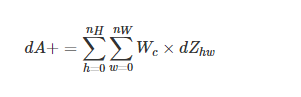

# A表示输入层的经过激活函数处理后的输出也就是下一层的输入，w表示卷积核矩阵，dz表示下一层未经激活函数处理的输出z的关于损失函数的导数

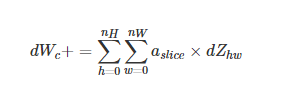

# aslice表示输入层当前slice的矩阵

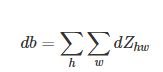 

In [ ]:
def zero_pad(X, pad):
 
    X_pad = np.pad(X, ((0,0),(pad,pad),(pad,pad),(0,0)), 'constant')
 
    return X_pad
def conv_backword(dz,cache):
    a_input,w,b,hparameters=cache#a表示当前的卷积层的输出，也就是下一个卷积层的输入，dz表示下一个卷积层未经过激活函数处理的值z的梯度导数，w表示卷积核函数
    (m,col,row)=a_input.shape#m个样本
    (n_c,f,f)=w.shape#n_c个filter
    stride=hparameters['stride']
    pad=hparameters['pad']
    (m,n_h,n_w)=dz.shape
    da_input=np.zeros(m,col,row)
    dw=np.zeros(n_c,f,f)#n_c个filter
    db=np.zeros(n_c,1,1)
    for i in range(m):
        a_temp=a_input[i,:,:]
        da_temp=a_input[i,:,:]
        for h in n_h:
            for w in n_w:
                for c in n_c:
                    v_start=h*stride
                    v_end=v_start+f
                    h_start=w*stride
                    h_end=h_start+f
                    a_slice=a_temp[v_start:v_end,h_start:h_end]
                    da_temp[v_start:v_end,h_start:h_end]+=w[c,:,:]*dz[i,h,w]#对每个z，z都是w矩阵和这个slice卷积得到的，且每个x在不同的slice中会得到不同的z，所以这个slice的每个x的导数都需要加上w矩阵对应的w乘以该slice对应的dz，对输入的每个a在对应slice不同时都会有相应的运算，所以在每次的slice都需要加上对应的导数
                    dw[c,:,:]+=a_slice*dz[i,h,w]#对w矩阵中的每个w,在与不同slice卷积时都是与该slice中对应输入a做乘积得到z，所以对每个slice，每个w都需要加上对应输入a与dz的乘积
                    db[c,:,:]+=dz[i,h,w]#与dw同理，只不过没有乘输入a
        da_input[i,:,:]=da_temp            
    return da_input,dw,db


In [ ]:
def create_mask_frommat(x):
    mask=(x==np.max(x))#获得矩阵中只有最大值为1其余都为0
    return mask
def distribute_value(dz,shape):
    (n_h,n_w)=shape
    average=dz/(n_h*n_w)
    a=average*np.ones(shape)#对矩阵中的每个数都除以矩阵元素总个数，做平均池化的时候就是这么做的
    return a
def pool_backword(dz,cache,mode):#池化层没有w和b的导数
    (a_input,hparamters)=cache
    stride=hparameters['stride']
    f=hparameters['f']
    m,col,row=a_input.shape#m个样本
    m,n_h,n_w=dz.shape
    da_input=np.zeros(a_input.shape)
    for i in range(m):
        a_temp=a_input[i,:,:]
        for h in range(n_h):
            for w in range(n_w):
                v_start=h*stride
                v_end=v_start+f
                h_start=w*stride
                h_end=h_start+f
                if mode=='max':
                    a_slice=a_temp[v_start:v_end,h_start:h_end]
                    mask=create_mask_frommat(a_slice)
                    da_input[i,:,:]+=mask*dz[i,h,w]#每次slice中只有最大的那一个最后被纳入z中，所以只需要最大的那个乘以dz，其余的都不需要
                elif mode=='average':
                    dz_temp=dz[i,:,:]
                    shape=(f,f)
                    a_slice=a_temp[v_start:v_end,h_start:h_end]
                    da_input[i,:,:]+=distribute_value(dz_temp,shape)#每次的slice都是将每个输入a乘上1/f*f然后加总得到z，所以每个输入a的导数都需要加上1、f*f乘以对应slice的dz
    return da_input     